### Importing libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [13]:
import os
os.chdir("C:/Users/Abhishek.Bansal/OneDrive - Fractal Analytics Pvt. Ltd/Documents/Personal/Tiger")

### Reading data

In [14]:
df = pd.read_csv("data.csv")

In [6]:
df.head()

,Month,B1_sales_value,cat_sales_value,C1_sales_value,C2_sales_value,C3_sales_value,C4_sales_value,C5_sales_value,C6_sales_value,C7_sales_value,...,C3_non_tv_spend,C4_non_tv_spend,C5_non_tv_spend,C6_non_tv_spend,C7_non_tv_spend,TP1,TP2,TP3,CP1,CP2
0,01-10-2001,12552.42,62845.19,30553.92,3378.92,1631.54,2491.49,3578.44,2394.85,1269.65,...,NaN,NaN,NaN,NaN,NaN,,,3601,0,15413
1,01-11-2001,12363.50,63750.28,31747.62,3788.86,1529.16,1958.63,3962.10,2122.06,1191.30,...,NaN,NaN,NaN,NaN,NaN,,,757,,15953
2,01-12-2001,12771.89,65869.93,32804.70,3914.98,1580.14,2023.92,4094.17,2192.80,1231.01,...,NaN,NaN,NaN,NaN,NaN,,,3119,,17148
3,01-01-2002,13914.19,68350.41,34440.56,3832.02,1443.07,1949.26,3479.77,2366.00,1364.42,...,NaN,NaN,NaN,NaN,NaN,,,577,83,1164
4,01-02-2002,12564.65,61731.25,31106.38,3461.06,1303.42,1760.62,3143.01,2137.03,1232.38,...,NaN,NaN,NaN,NaN,NaN,1293,0,1718,3907,3182


### Checking data types and converting into required data type

In [84]:
pd.set_option('display.max_rows', 80)
#df.dtypes

In [15]:
#Renaming columns as some have white spaces
df.rename(columns = {' TP1 ':'TP1', ' TP2 ':'TP2', ' TP3 ':'TP3', ' CP1 ':'CP1', ' CP2 ':'CP2'}, inplace = True)

In [16]:
#Replacing spaces or blank values with NaN
df['C1_GRP'] = df['C1_GRP'].replace(r"^\s*$", np.nan, regex = True)
df['C2_GRP'] = df['C2_GRP'].replace(r"^\s*$", np.nan, regex = True)
df['TP1'] = df['TP1'].replace(r"^\s*$", np.nan, regex = True)
df['TP2'] = df['TP2'].replace(r"^\s*$", np.nan, regex = True)
df['CP1'] = df['TP3'].replace(r"^\s*$", np.nan, regex = True)

In [17]:
#Changing data types
#df['C1_GRP'] = df['C1_GRP'].astype("float")
df = df.astype({'C1_GRP': float, 'C2_GRP': float, 'TP1': float, 'TP2': float, 'CP1': float})

In [18]:
#Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'], format = '%d-%m-%Y')

### Descriptive analytics and related data pre-processing

In [13]:
df[rem_columns2].shape

(37, 56)

In [137]:
df[rem_columns2].describe().T

,count,mean,std,min,25%,50%,75%,max
B1_sales_value,37.0,19146.890270,5388.232921,12363.50,13914.19,17734.97,23292.63,30026.40
cat_sales_value,37.0,77727.802703,13096.368469,61731.25,67466.28,74112.21,86320.78,107934.61
C1_sales_value,37.0,36975.577568,4224.374761,30553.92,34099.19,35620.43,39668.88,47249.55
C2_sales_value,37.0,3871.729730,660.648774,3104.84,3384.90,3652.61,4264.60,5906.53
C3_sales_value,37.0,1277.477568,216.279552,1033.92,1084.23,1226.48,1457.33,1801.33
C4_sales_value,37.0,2069.935405,490.316602,1327.37,1628.31,2023.92,2459.03,3219.42
C5_sales_value,37.0,3928.297568,782.413820,2845.66,3172.39,3844.87,4397.41,5562.60
C6_sales_value,37.0,2070.949730,210.806906,1734.91,1823.49,2120.50,2211.78,2411.91
C7_sales_value,37.0,1523.526486,535.012986,860.24,1119.65,1364.42,1915.99,2960.88
B1_sales_volume,37.0,1215.357838,270.838498,840.41,937.69,1170.73,1450.65,1707.50


In [19]:
#Replace NA's with 0's for spend and promotion columns
spend_promo_columns = df.loc[:,'B1_non_tv_spend':].columns

for i in spend_promo_columns:
    df[i] = df[i].fillna(0)

In [20]:
#Remove columns with more than 80% null values
all_cols = df.columns
removed_cols = []

for i in all_cols:
    null_rows = sum(df[i].isnull())
    null_perc = null_rows / (df.shape[0]) * 100
    
    if null_perc > 80:
        removed_cols.append(i)
        print((i + " " + str(null_perc) + "%"))

rem_columns = [i for i in all_cols if i not in removed_cols]

C2_GRP 81.08108108108108%
C3_GRP 100.0%
C4_GRP 100.0%
C5_GRP 100.0%
C6_GRP 100.0%
C7_GRP 100.0%


In [21]:
#Remove columns with more than 80% zero values
removed_zero_cols = []

for i in rem_columns:
    zero_rows = sum(df[i] == 0)
    zero_perc = zero_rows / (df.shape[0]) * 100
    
    if zero_perc > 80:
        removed_zero_cols.append(i)
        print((i + " " + str(zero_perc) + "%"))

rem_columns2 = [i for i in rem_columns if i not in removed_zero_cols]

C2_non_tv_spend 94.5945945945946%
C3_non_tv_spend 100.0%
C4_non_tv_spend 100.0%
C5_non_tv_spend 100.0%
C6_non_tv_spend 100.0%
C7_non_tv_spend 100.0%
TP2 100.0%


In [22]:
#Replace null values in grp columns with zero assuming no tv adv in those months
grp_cols = ['B1_grp','cat_GRP','C1_GRP']

for i in grp_cols:
    df[i] = df[i].fillna(0)

In [15]:
df[rem_columns2].to_csv("data_rem_columns2.csv")

In [16]:
#Visualize
#sns.pairplot(df[rem_columns2].loc[:,"B1_sales_value":"C7_sales_value"])
#sns.pairplot(df[rem_columns2].loc[:,"B1_distr":"C7_distr"])

In [19]:
#Correlations
plt.figure(figsize=(15,6))
#heatmap = sns.heatmap(df[rem_columns2].corr(), annot=True, cmap="Blues")
#sns.heatmap(df[rem_columns2].corr(), annot=True)
df[rem_columns2].corr().to_csv("correlations_rem_column2.csv")

<Figure size 1080x432 with 0 Axes>

### Adstock computation

In [34]:
# Adstock computation for GRP and non-TV features (B1_grp, C1_GRP, B1_non_tv_spend, C1_non_tv_spend)

new_df = df[['Month', 'B1_sales_volume', 'B1_grp', 'C1_GRP', 'B1_non_tv_spend', 'C1_non_tv_spend']]

# Using decay values from 0.1 to 0.9 at 0.05 interval
decay = [i/20 for i in range(1,20)]

for col in ['B1_grp', 'C1_GRP', 'B1_non_tv_spend', 'C1_non_tv_spend']: 
    for d in decay:
        col_name = col+"_decay"+str(d)+"_lag0"
        new_df[col_name] = 0
        for j in range(new_df.shape[0]):
            if j == 0:
                new_df[col_name][j] = new_df[col][j] * d
            else:
                new_df[col_name][j] = new_df[col][j] * d + new_df[col][j-1] * (1-d)
        
        for lag in [1,2,3]:
            col_lag = col+"_decay"+str(d)+"_lag" + str(lag)
            new_df[col_lag] = new_df[col_name].shift(lag).fillna(0)

<ipython-input-34-e934fb2ea607>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col_name] = 0
<ipython-input-34-e934fb2ea607>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col_name][j] = new_df[col][j] * d
C:\Users\Abhishek.Bansal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, sel

In [42]:
# Log of all columns
for i in new_df.columns:
    if i not in ['Month', 'B1_sales_volume', 'B1_grp', 'C1_GRP', 'B1_non_tv_spend', 'C1_non_tv_spend']:
        new_df[i] = np.log(new_df[i])

C:\Users\Abhishek.Bansal\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Feature Importance to select few features
# Setting X and y variables
X = df.loc[:, df.columns != 'sales']
y = df['sales']# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
# Building the MMM model
import statsmodels.formula.api as sm
model = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
print(model.summary())

In [ ]:
# PLot actual vs predicted values
from matplotlib.pyplot import figure
y_pred = model.predict()
labels = df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
#Insights
#TP3 and CP1 have very strong linear relationship


In [17]:
cols_to_consider = ["B1_sales_value","B1_sales_volume","B1_dealers","B1_distr","B1_avg_price","B1_grp","C1_GRP","B1_non_tv_spend","C1_non_tv_spend","TP1","TP3","CP1","CP2"]

In [ ]:
## VIF exceeding 5 or 10 means high multicollinearity in data
## VIF = 1 / (1-R^2)
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
print(cross_val_score(lr, X, y, cv=TimeSeriesSplit()))
lr.fit(X, y) # refit the model with the complete dataset
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print(lr.predict(([[11543.58, 4615.35, 2518.88]])))

In [ ]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

In [ ]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores = cross_val_score(model, 
                             X_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores)))
    }

    df_models = df_models.append(row, ignore_index=True)

In [ ]:
# Assess the best model
regressor = XGBRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

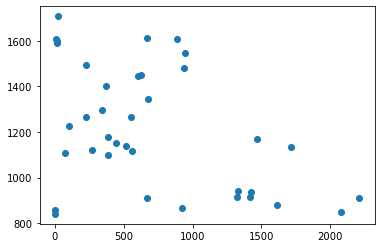

In [28]:
plt.scatter(df['B1_grp'], df['B1_sales_volume'])

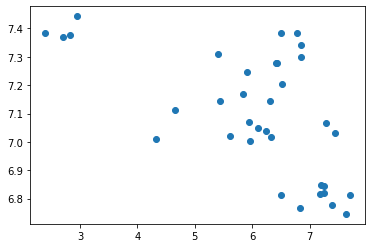

In [30]:
plt.scatter(np.log(df['B1_grp']), np.log(df['B1_sales_volume']))

<ipython-input-31-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [43]:
new_df.head()

,Month,B1_sales_volume,B1_grp,C1_GRP,B1_non_tv_spend,C1_non_tv_spend,B1_grp_decay0.05_lag0,B1_grp_decay0.05_lag1,B1_grp_decay0.05_lag2,B1_grp_decay0.05_lag3,...,C1_non_tv_spend_decay0.85_lag2,C1_non_tv_spend_decay0.85_lag3,C1_non_tv_spend_decay0.9_lag0,C1_non_tv_spend_decay0.9_lag1,C1_non_tv_spend_decay0.9_lag2,C1_non_tv_spend_decay0.9_lag3,C1_non_tv_spend_decay0.95_lag0,C1_non_tv_spend_decay0.95_lag1,C1_non_tv_spend_decay0.95_lag2,C1_non_tv_spend_decay0.95_lag3
0,2001-10-01,855.47,0.0,0.0,0.0,0.0,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,2001-11-01,840.41,0.0,0.0,0.0,0.0,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2,2001-12-01,868.16,923.0,1271.0,0.0,14625.0,3.828641,-inf,-inf,-inf,...,-inf,-inf,9.485089,-inf,-inf,-inf,9.539140,-inf,-inf,-inf
3,2002-01-01,942.16,1329.0,0.0,154471.0,0.0,6.849066,3.828641,-inf,-inf,...,-inf,-inf,7.287561,9.485089,-inf,-inf,6.594413,9.539140,-inf,-inf
4,2002-02-01,850.78,2075.0,0.0,126568.0,0.0,7.219642,6.849066,3.828641,-inf,...,9.427949,-inf,-inf,7.287561,9.485089,-inf,-inf,6.594413,9.53914,-inf


In [41]:
if 'Mo' not in ['Month', 'B1_sales_volume', 'B1_grp', 'C1_GRP', 'B1_non_tv_spend', 'C1_non_tv_spend']:
    print('no')

no


True